# Getting started with `sidewinder`

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys
sys.path.append(os.pardir)  # Needed for sidewinder import before we install it

import matplotlib.pyplot as plt

from sidewinder.synthetic import synthetic_arterial_pressure_data
from sidewinder.waveforms import Waveforms
from sidewinder.features.waveform import find_troughs
from sidewinder.features import cycle

## Load some waveform data

We generate some synthetic arterial blood pressure data for demonstration purposes.

In [3]:
data = synthetic_arterial_pressure_data(
    systolic_pressure=120,
    diastolic_pressure=80,
    heart_rate=70,
    n_beats_target=5.5,
    hertz=200
)

data.head()

,time,pressure
0,0.000,80.036898
1,0.005,80.171417
2,0.010,80.491293
3,0.015,81.096162
4,0.020,82.081690


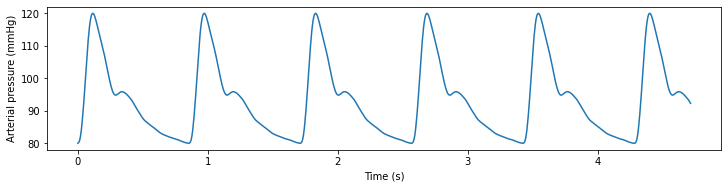

In [4]:
fig, ax = plt.subplots(figsize=(10, 2.5), constrained_layout=True)
ax.plot(data.time, data.pressure)
ax.set(xlabel='Time (s)', ylabel='Arterial pressure (mmHg)')
plt.show()

## Load the data into `sidewinder`

In [5]:
wf = Waveforms(data)

## Find troughs in a waveform

For example, we could use the troughs to split our arterial blood pressure data into separate heartbeats.

In [6]:
wf = find_troughs(wf, name='pressure')

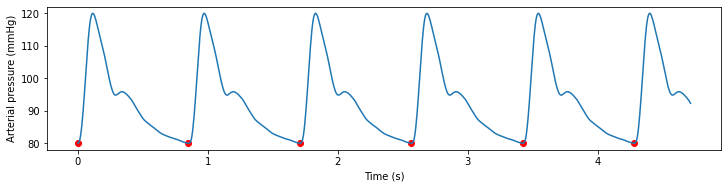

In [7]:
fig, ax = plt.subplots(figsize=(10, 2.5), constrained_layout=True)
ax.plot(data.time, data.pressure)
ax.scatter(
    data.time[wf.waveform_features['pressure']['troughs']],
    data.pressure[wf.waveform_features['pressure']['troughs']],
    color='red',
)
ax.set(xlabel='Time (s)', ylabel='Arterial pressure (mmHg)')
plt.show()

## Extract per-cycle features

In [8]:
for feature_extractor in [
    cycle.Duration,
    cycle.CyclesPerMinute,
    cycle.MaximumValue,
    cycle.MinimumValue,
    cycle.MeanValue,
    cycle.MaximumMinusMinimumValue,
    cycle.MeanNegativeFirstDifference
]:
    wf = feature_extractor().extract_feature(wf, 'pressure')

In [9]:
wf.cycle_features

{'pressure': {'Duration': array([0.85 , 0.86 , 0.855, 0.86 , 0.855]),
  'CyclesPerMinute': array([70.58823529, 69.76744186, 70.1754386 , 69.76744186, 70.1754386 ]),
  'MaximumValue': array([120.        , 119.97736746, 119.99709951, 119.99027587,
         119.98921318]),
  'MinimumValue': array([80.00332686, 80.00103817, 80.00103817, 80.00115878, 80.        ]),
  'MeanValue': array([92.64628119, 92.50011353, 92.57275326, 92.50011546, 92.57275413]),
  'MaximumMinusMinimumValue': array([39.99667314, 39.97632929, 39.99606134, 39.98911708, 39.98921318]),
  'MeanNegativeFirstDifference': array([-0.2996558 , -0.29514956, -0.2996549 , -0.29734221, -0.29958959])}}